# Ашуров Г.В. ИУ5-61Б. Вариант 1

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Импорт библиотек

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка и просмотр данных

In [26]:
# Загрузка данных Iris
iris = load_iris()
X = iris.data
y = iris.target

# Преобразование данных в DataFrame для удобства анализа
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

# Показ первых нескольких строк датасета
print(iris_df.head())

# Общая информация о датасете
print(iris_df.info())

# Основные статистики
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes:

Распределения признаков

species
0    50
1    50
2    50
Name: count, dtype: int64


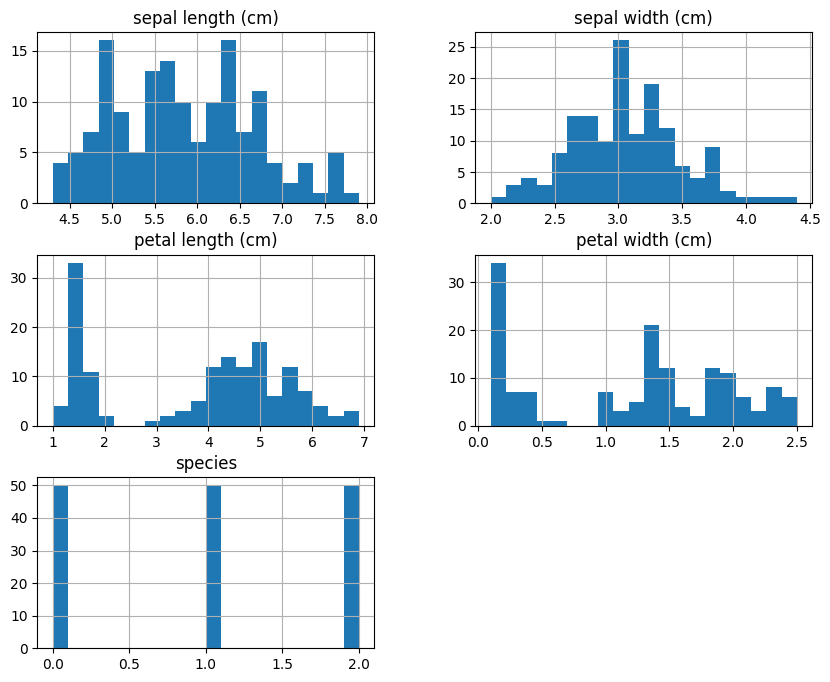

In [28]:
print(iris_df['species'].value_counts())
iris_df.hist(bins=20, figsize=(10, 8))
plt.show()


Визуализация данных

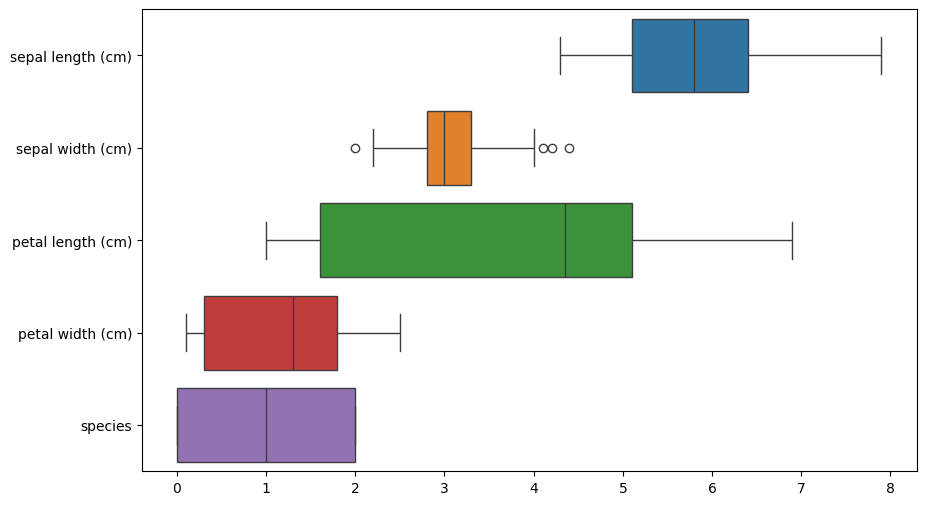

In [27]:
# выявление выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, orient="h")
plt.show()


Анализ корреляции признаков

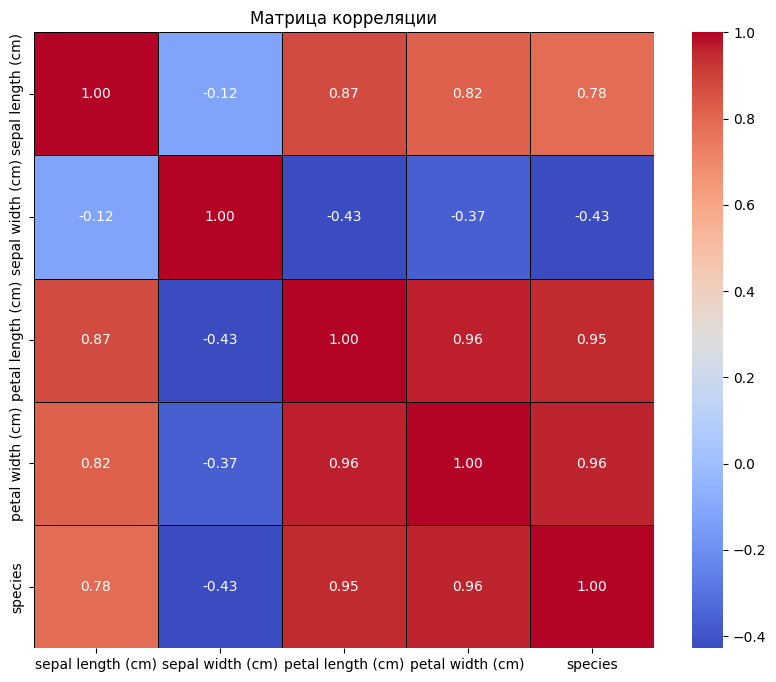

In [29]:
# Корреляционная матрица
corr_matrix = iris_df.corr()
plt.figure(figsize=(10, 8))  # Измените размер фигуры по желанию
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor="black")
plt.title('Матрица корреляции')  # Добавьте заголовок
plt.show()


Разделение данных на обучающую и тестовую выборки и стандартизация

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Метод логистической регрессии

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание результатов для тестовой выборки
y_pred = model.predict(X_test)

# Оценка модели (качества модели)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Logistic Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix_result)


Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Метод случайного леса

In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Вывод

Используя различные метрики, мы смогли получить полное понимание качества классификации. Результаты показывают схожие значения для обоих методов — логистической регрессии и случайного леса. Не смотря на это можно предположить, что случайный лес обеспечивает более стабильные результаты.